In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-weather-2013-2023/boston_weather_data.csv


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/kaggle/input/boston-weather-2013-2023/boston_weather_data.csv')
df

,time,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2013-03-01,3.2,1.1,5.0,0.0,342.0,15.1,1002.7
1,2013-03-02,3.1,1.1,5.6,0.0,307.0,14.4,1004.2
2,2013-03-03,2.6,0.6,6.1,0.0,NaN,14.4,1002.6
3,2013-03-04,1.8,-0.6,5.0,0.0,303.0,28.1,1003.0
4,2013-03-05,2.9,0.0,6.1,0.0,NaN,16.6,1013.5
...,...,...,...,...,...,...,...,...
3648,2023-02-25,-7.9,-10.6,-6.7,0.3,313.0,11.9,1029.5
3649,2023-02-26,-4.2,-7.8,3.9,0.0,268.0,11.9,1012.6
3650,2023-02-27,-1.7,-2.8,-0.6,0.0,46.0,18.7,1014.9
3651,2023-02-28,0.6,-1.7,2.2,7.1,86.0,23.8,1010.7


Boston weather data (2013-03-01 to 2023-02-28) sorted yearly and monthly for climate assessment.

In [3]:
df = df[:3652].copy() #discarding the 2023-03-01 single data
df['year'] = df['time'].str[:4] #sorted yearly
df['month'] = df['time'].str[5:7] #sorted monthly(regardless of year)
df['year-month'] = df['time'].str[:7] #sorted by year and the associated month together
df

,time,tavg,tmin,tmax,prcp,wdir,wspd,pres,year,month,year-month
0,2013-03-01,3.2,1.1,5.0,0.0,342.0,15.1,1002.7,2013,03,2013-03
1,2013-03-02,3.1,1.1,5.6,0.0,307.0,14.4,1004.2,2013,03,2013-03
2,2013-03-03,2.6,0.6,6.1,0.0,NaN,14.4,1002.6,2013,03,2013-03
3,2013-03-04,1.8,-0.6,5.0,0.0,303.0,28.1,1003.0,2013,03,2013-03
4,2013-03-05,2.9,0.0,6.1,0.0,NaN,16.6,1013.5,2013,03,2013-03
...,...,...,...,...,...,...,...,...,...,...,...
3647,2023-02-24,-0.9,-7.7,3.3,0.3,310.0,23.4,1020.9,2023,02,2023-02
3648,2023-02-25,-7.9,-10.6,-6.7,0.3,313.0,11.9,1029.5,2023,02,2023-02
3649,2023-02-26,-4.2,-7.8,3.9,0.0,268.0,11.9,1012.6,2023,02,2023-02
3650,2023-02-27,-1.7,-2.8,-0.6,0.0,46.0,18.7,1014.9,2023,02,2023-02


Creating a dual-axis visualization showing the relationship between temperature and precipitation patterns in Boston across an annual cycle. (Finding1)

Finding1: Boston Climate Figure


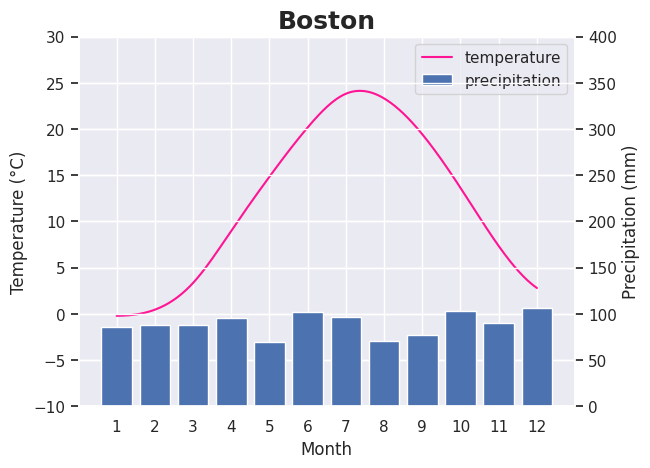

In [4]:
from scipy.interpolate import make_interp_spline

# Calculate monthly climate averages
month_tem_avg = df.groupby('month')['tavg'].mean() # monthly temperature average
df['year_month_prcp'] = df.groupby('year-month')['prcp'].transform('sum') # monthly precipitation total
month_prcp_avg = df.groupby('month')['year_month_prcp'].mean() # average monthly precipitation

#Convert to plottable format
month = list(month_prcp_avg.index.astype(int))
prcp = list(month_prcp_avg.values.astype(float))
tem = list(month_tem_avg.values.astype(float))

#Create smooth curve using spline interpolation
x_smooth = np.linspace(min(month), max(month), 300) 
spl = make_interp_spline(month, tem, k=3) 
tem_smooth = spl(x_smooth)

#Visualization
fig, ax_tem = plt.subplots()
ax_prcp = ax_tem.twinx()
ax_prcp.bar(month, prcp, label = 'precipitation') #bars for precipitation
ax_tem.plot(x_smooth, tem_smooth, color = 'deeppink', label = 'temperature') #smooth line for temperature
ax_prcp.set_ylim(0, 400)
ax_tem.set_ylim(-10, 30)
ax_tem.set_xticks(range(1, 13))
lines, labels = ax_tem.get_legend_handles_labels()
lines2, labels2 = ax_prcp.get_legend_handles_labels()
ax_tem.legend(lines + lines2, labels + labels2, loc='upper right')
ax_tem.set_xlabel('Month')
ax_prcp.set_ylabel('Precipitation (mm)')
ax_tem.set_ylabel('Temperature (°C)')
plt.title('Boston', fontsize=18, fontweight='bold')

print('Finding1: Boston Climate Figure')
plt.show()

Finding2 - Finding5 are all about climate change.

Examining the January temperature trend in Boston from 2014 to 2023, focusing on the coldest month as a key climate change indicator. (Finding2)

Finding2: Boston average temperature of the coldest month is consistent with global warming


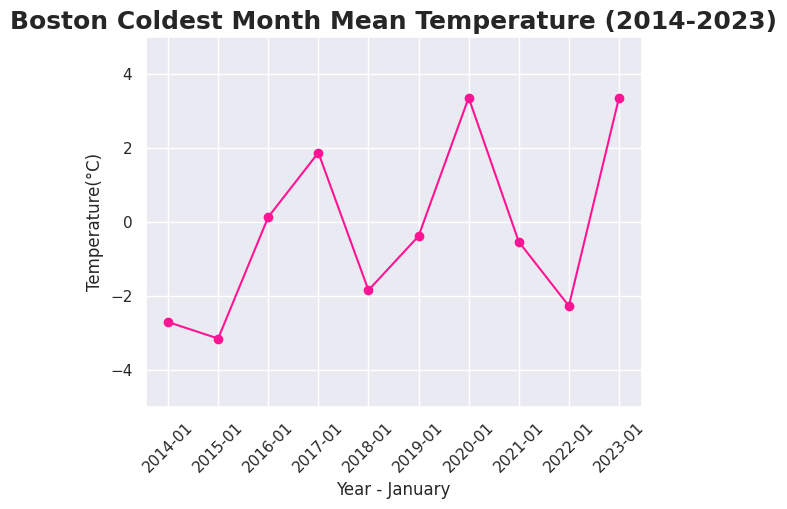

In [5]:
#Extracting coldest month data
df_tem_month_change = df.groupby('year-month')['tavg'].mean() #calculate monthly average temperature for all year-month combinations
cold_change = df_tem_month_change[df_tem_month_change.index.str.endswith('-01')] #extract only January data (coldest month)

#Convert to plottable format
year = list(cold_change.index)
year_tem = list(cold_change.values)

#Visualization
plt.subplots()
plt.plot(year, year_tem, marker = 'o', color = 'deeppink')
plt.ylim(-5, 5)
plt.xticks(year, rotation=45)
plt.xlabel('Year - January')
plt.ylabel('Temperature(°C)')
plt.title('Boston Coldest Month Mean Temperature (2014-2023)', fontsize=18, fontweight='bold')

print('Finding2: Boston average temperature of the coldest month is consistent with global warming')
plt.show()

note: When verifying global warming, the mean temperature of the coldest month is a more robust indicator than that of the warmest month. This is primarily due to the physical mechanism of the greenhouse effect, which most effectively inhibits radiative cooling. This inhibition is most detectable during the seasonal temperature minimum, leading to a faster rate of warming in winter and thus providing a clearer, less noisy signal of climate change.

Calculating and visualizing the annual temperature range in Boston from 2014 to 2022, revealing key climate change patterns. (Finding3)

Finding3: The annual temperature range in Boston is consistent with global warming


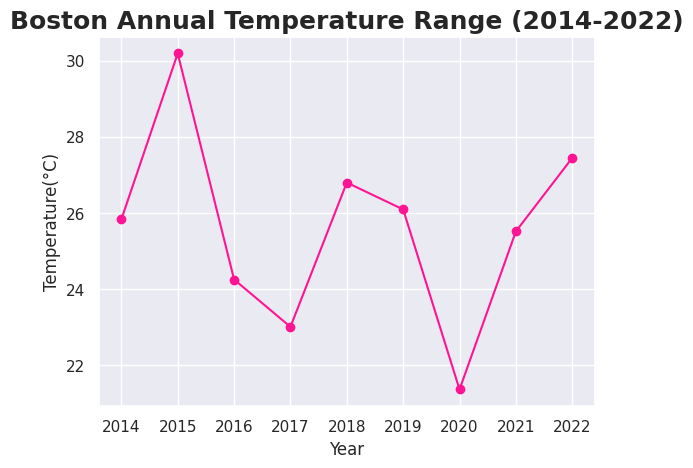

In [6]:
df_tem_month_change = df.groupby('year-month')['tavg'].mean() #calculate monthly average temperature for all year-month combinations

#Compute annual temperature range: Calculate yearly difference between hottest and coldest months, in plottable format
annual_temperature_range = []
yearr = []
for i in range(14, 23):
    year_name = '20' + str(i)
    year_month_tem = df_tem_month_change[df_tem_month_change.index.str.startswith(year_name)] #get all monthly average temperature for a single year
    year_tem_variation = year_month_tem.max()-year_month_tem.min() #annual range calculation
    annual_temperature_range.append(year_tem_variation)
    yearr.append(year_name)

#Visualization
plt.subplot()
plt.plot(yearr, annual_temperature_range, marker = 'o', color = 'deeppink')
plt.xlabel('Year')
plt.ylabel('Temperature(°C)')
plt.title('Boston Annual Temperature Range (2014-2022)', fontsize=18, fontweight='bold')

print('Finding3: The annual temperature range in Boston is consistent with global warming')
plt.show()

note: The observed decline in the annual temperature range provides mechanistic evidence for global warming, fundamentally linked to the rapid warming of the coldest month (Finding2). This phenomenon, termed 'asymmetric warming', results from the greenhouse effect's heightened efficiency at inhibiting heat loss during the cold season. The steep temperature increase in the coldest month disproportionately narrows the annual range, serving as a direct indicator of anthropogenic climate change.

Examining the year-to-year changes in Boston's total precipitation from 2014 to 2022, revealing patterns of climate instability. (Finding4)

Finding4: Changes in annual total precipitation for Boston reveal climate change


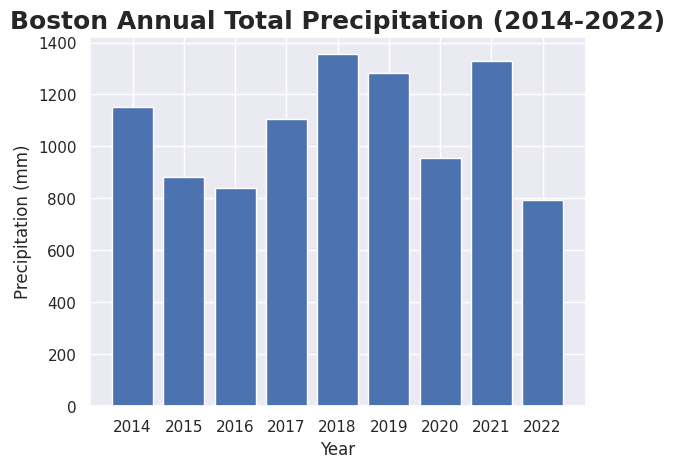

In [7]:
year_month_prcp = df.groupby('year-month')['prcp'].sum() #calculate monthly precipitation totals across all years

#Compute annual precipitation: Sum monthly totals to get annual values, in plottable format
year_prcp = []
yearr = []
for i in range(14, 23):
    year_name = '20' + str(i)
    single_year_month_prcp = year_month_prcp[year_month_prcp.index.str.startswith(year_name)] #get all monthly total precipitation for a single year
    single_year_prcp = single_year_month_prcp.sum() #calculate the annual total by summing the monthly totals
    year_prcp.append(single_year_prcp)
    yearr.append(year_name)
    
#Visualization
plt.subplot()
plt.bar(yearr, year_prcp)
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.title('Boston Annual Total Precipitation (2014-2022)', fontsize=18, fontweight='bold')

print('Finding4: Changes in annual total precipitation for Boston reveal climate change')
plt.show()

note: The analysis of Boston's annual precipitation from 2014 to 2022 reveals a pattern of high volatility and extremization, rather than a simple linear trend. This period was marked by sharp year-to-year swings, including a dramatic drop of over 500 mm from 2021 to 2022. The data shows a 'feast or famine' cycle, with exceptionally wet years like 2018 (about 1355 mm) immediately following near-average years, and a severe drought year in 2022 (about 795 mm). This increased variability and the occurrence of such extremes on both ends of the spectrum are hallmark signatures of a changing climate, consistent with model predictions that a warmer atmosphere leads to more intense precipitation events and more pronounced drought conditions.

Examines the highest monthly precipitation levels in Boston from 2014 to 2022, revealing trends in extreme rainfall events. (Finding5)

Finding5: The month of maximum precipitation in Boston is consistent with global warming


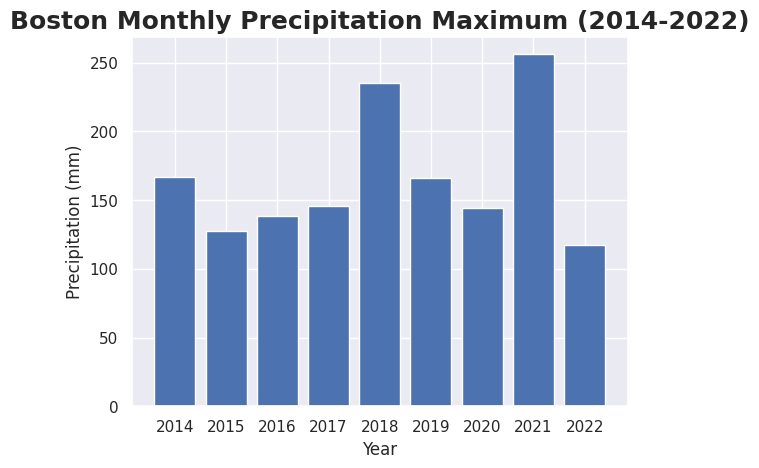

In [8]:
year_month_prcp = df.groupby('year-month')['prcp'].sum() #calculate total precipitation for each month across all years

# Extract annual peaks: Identify wettest month for each year, in plottable format
wet = []
yearr = []
for i in range(14, 23):
    year_name = '20' + str(i)
    single_year_month_prcp = year_month_prcp[year_month_prcp.index.str.startswith(year_name)] #get all monthly precipitation values for a single year
    single_year_wet = single_year_month_prcp.max() #find the maximum monthly precipitation (wettest month)
    wet.append(single_year_wet)
    yearr.append(year_name)
    
#Visualization
plt.subplot()
plt.bar(yearr, wet)
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.title('Boston Monthly Precipitation Maximum (2014-2022)', fontsize=18, fontweight='bold')

print('Finding5: The month of maximum precipitation in Boston is consistent with global warming')
plt.show()

note: Boston's maximum monthly rainfall (2014-2022) shows a clear shift toward more extreme precipitation, consistent with global warming. Two exceptional peaks occurred in 2018 (235.1 mm) and 2021 (256.0 mm), indicating increased frequency of heavy deluges. These extremes cluster in the latter part of the record, forming an 'intermittent but intensifying pulse' pattern that matches climate model predictions. This trend is explained by the physical principle that a warmer atmosphere holds more moisture - raising the potential ceiling for rainfall during storms and directly confirming the intensification of precipitation extremes in the region.

Based on the comprehensive analysis of Boston's climate data from 2013-2023, five key findings collectively provide strong evidence of global warming's impact on the region:

Executive Summary: Boston's Climate Transformation

Our analysis reveals consistent patterns of climate change across multiple dimensions of Boston's weather systems. Finding 1 established the fundamental relationship between temperature and precipitation in Boston's annual cycle, providing the baseline for detecting anomalies. Finding 2 demonstrated that Boston's coldest month (January) shows a clear warming trend, which is particularly significant as winter warming provides the most robust indicator of climate change due to the greenhouse effect's enhanced efficiency during cold seasons.

The evidence extends beyond simple temperature increases. Finding 3 revealed a decreasing annual temperature range, illustrating the phenomenon of "asymmetric warming" where colder seasons warm faster than warmer ones. This range compression directly links to the rapid winter warming observed in Finding 2.

Most notably, our precipitation analysis uncovered dramatic changes. Finding 4 showed high volatility in annual precipitation totals, characterized by a "feast or famine" cycle with extreme swings between very wet and very dry years. This pattern culminates in Finding 5, which identifies intensifying peaks in maximum monthly precipitation, particularly the exceptional events in 2018 (235.1 mm) and 2021 (256.0 mm).

Collectively, these findings present a coherent picture: Boston is experiencing warmer winters, reduced temperature variability, and more extreme precipitation patterns—all hallmarks of climate change predicted by global warming models. The consistency across these independent metrics strengthens the conclusion that these changes are not random fluctuations but part of a systematic climate shift affecting the region.